In [2]:
import torch
import numpy as np


In [3]:
np.arange(1, 10)


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
torch.arange(1, 10, 3)


tensor([1, 4, 7])

In [6]:
a = torch.arange(1, 10)

#torch.mean(a) gives an error
torch.mean(a.type(torch.float32))


tensor(5.)

/tmp/ipykernel_184035/2238747766.py:7: UserWarning: To copy construct from a tensor, it is recommended to use 
sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than 
tensor.new_tensor(sourceTensor).
  lambda a: a.new_tensor(a),

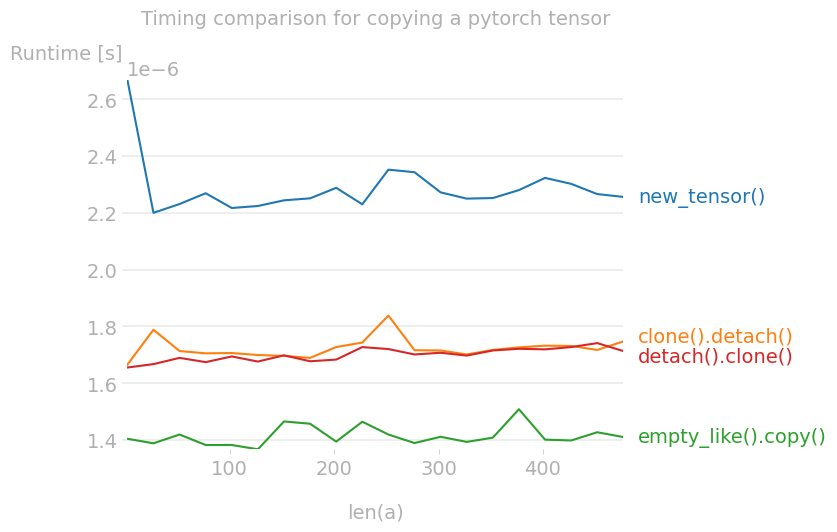

In [9]:
import perfplot

perfplot.show(
    setup=lambda n: torch.randn(n),
    n_range=[k for k in range(2, 500, 25)],
    kernels=[
        lambda a: a.new_tensor(a),
        lambda a: a.clone().detach(),
        lambda a: torch.empty_like(a).copy_(a),
        lambda a: a.detach().clone(),
    ],
    labels=["new_tensor()", "clone().detach()", "empty_like().copy()", "detach().clone()"],
    xlabel="len(a)",
    logx=False,
    logy=False,
    title='Timing comparison for copying a pytorch tensor',
	equality_check=None
)


In [8]:
torch.manual_seed(42)
a = torch.rand((2, 2, 3))
b = torch.ones((2, 3, 2))
c = a @ b
print(a)
print()
print(b)
print()
print(c)
print()
print(c.shape)


tensor([[[0.8823, 0.9150, 0.3829],
         [0.9593, 0.3904, 0.6009]],

        [[0.2566, 0.7936, 0.9408],
         [0.1332, 0.9346, 0.5936]]])

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

tensor([[[2.1801, 2.1801],
         [1.9506, 1.9506]],

        [[1.9910, 1.9910],
         [1.6614, 1.6614]]])

torch.Size([2, 2, 2])
